# Using Regression and Neural Network models to conduct an analysis on Four Factors and NBA Win Percentage 

Project by Vishnu Manathattai

Description: This project aims to assess the ability of the four-factors (effective field goal percentage, free throw attempt rate, turnover ratio, and offensive rebounding percentage), as well as opposing team four factors in predicting win percentage for NBA teams. Essentially, the goal is to train a model that can take the input of the four factors for their team and four factors for the opposing teams they have played in order to predict their win percentage accurately. The data for the model comes from the official NBA website (https://www.nba.com/stats/teams/four-factors?PerMode=Per100Possessions&Season=2022-23) and looks at the four factor stats per 100 possessions. The data is from the past 5 NBA seasons up to the 2021-22 season. The models are testing using data from the current statistics from the 2022-23 season (as of February 2023), to see if the model can predict wins from the four factors in an arbitrary season. The inspiration for this project comes from the following paper: https://www.researchgate.net/publication/227378929_Are_the_Four_Factors_Indicators_of_One_Factor_An_Application_of_Structural_Equation_Modeling_Methodology_to_NBA_Data_in_Prediction_of_Winning_Percentage that looks at using four factors to predict winning percentage and furthermore dissects the contributions of offense and defense to winning. 



First, getting data from nba website for the past 5 seasons. Accessing url from notebook with relevant filters for season and datatype. Storing this tabular data in a pandas dataframe.

In [1]:
import requests
import pandas as pd
url = 'https://stats.nba.com/stats/leaguedashteamstats'
params =(
("Conference",""), 
("DateFrom",""), 
("DateTo", ""),
("Division:", ""),
("GameScope:", ""),
("GameSegment", ""),
("Height", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Four Factors"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"), 
("PaceAdjust", "N"),
("PerMode", "Per100Possessions"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"),
("Season", "2021-22"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),
("TeamID", "0"),
("TwoWay", "0"),
("VsConference", ""),
("VsDivision", ""))



header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 Edg/87.0.664.66",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}
response = requests.get(url, headers=header, params=params)
response_json = response.json()
frame = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
frame.columns = response_json['resultSets'][0]['headers']
frame.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,...,W_PCT_RANK,MIN_RANK,EFG_PCT_RANK,FTA_RATE_RANK,TM_TOV_PCT_RANK,OREB_PCT_RANK,OPP_EFG_PCT_RANK,OPP_FTA_RATE_RANK,OPP_TOV_PCT_RANK,OPP_OREB_PCT_RANK
0,1610612737,Atlanta Hawks,82,43,39,0.524,3941.0,0.543,0.253,0.120,...,16,30,8,11,1,17,24,6,28,12
1,1610612738,Boston Celtics,82,51,31,0.622,3981.0,0.542,0.239,0.139,...,6,2,9,22,13,11,1,9,11,16
2,1610612751,Brooklyn Nets,82,44,38,0.537,3951.0,0.540,0.246,0.141,...,14,19,11,18,18,9,9,20,21,30
3,1610612766,Charlotte Hornets,82,43,39,0.524,3976.0,0.544,0.234,0.131,...,16,3,7,24,9,14,25,11,5,29
4,1610612741,Chicago Bulls,82,46,36,0.561,3946.0,0.541,0.248,0.130,...,12,24,10,17,6,28,22,16,23,7


In [2]:
import requests
import pandas as pd
url = 'https://stats.nba.com/stats/leaguedashteamstats'
params =(
("Conference",""), 
("DateFrom",""), 
("DateTo", ""),
("Division:", ""),
("GameScope:", ""),
("GameSegment", ""),
("Height", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Four Factors"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"), 
("PaceAdjust", "N"),
("PerMode", "Per100Possessions"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"),
("Season", "2020-21"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),
("TeamID", "0"),
("TwoWay", "0"),
("VsConference", ""),
("VsDivision", ""))
    



header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 Edg/87.0.664.66",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}
response = requests.get(url, headers=header, params=params)
response_json = response.json()
frame2 = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
frame2.columns = response_json['resultSets'][0]['headers']
frame2.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,...,W_PCT_RANK,MIN_RANK,EFG_PCT_RANK,FTA_RATE_RANK,TM_TOV_PCT_RANK,OREB_PCT_RANK,OPP_EFG_PCT_RANK,OPP_FTA_RATE_RANK,OPP_TOV_PCT_RANK,OPP_OREB_PCT_RANK
0,1610612737,Atlanta Hawks,72,41,31,0.569,3481.0,0.539,0.278,0.133,...,11,11,16,4,10,6,6,10,29,9
1,1610612738,Boston Celtics,72,36,36,0.500,3476.0,0.543,0.234,0.141,...,16,16,12,23,18,3,16,27,13,13
2,1610612751,Brooklyn Nets,72,48,24,0.667,3481.0,0.575,0.258,0.134,...,4,11,1,8,12,22,9,13,27,23
3,1610612766,Charlotte Hornets,72,33,39,0.458,3471.0,0.532,0.238,0.149,...,19,19,19,21,25,9,26,5,6,26
4,1610612741,Chicago Bulls,72,31,41,0.431,3476.0,0.547,0.197,0.151,...,21,16,10,30,27,16,14,17,26,1


In [3]:
import requests
import pandas as pd
url = 'https://stats.nba.com/stats/leaguedashteamstats'
params =(
("Conference",""), 
("DateFrom",""), 
("DateTo", ""),
("Division:", ""),
("GameScope:", ""),
("GameSegment", ""),
("Height", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Four Factors"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"), 
("PaceAdjust", "N"),
("PerMode", "Per100Possessions"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"),
("Season", "2019-20"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),
("TeamID", "0"),
("TwoWay", "0"),
("VsConference", ""),
("VsDivision", ""))
    

header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 Edg/87.0.664.66",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}
response = requests.get(url, headers=header, params=params)
response_json = response.json()
frame3 = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
frame3.columns = response_json['resultSets'][0]['headers']
frame3.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,...,W_PCT_RANK,MIN_RANK,EFG_PCT_RANK,FTA_RATE_RANK,TM_TOV_PCT_RANK,OREB_PCT_RANK,OPP_EFG_PCT_RANK,OPP_FTA_RATE_RANK,OPP_TOV_PCT_RANK,OPP_OREB_PCT_RANK
0,1610612737,Atlanta Hawks,67,20,47,0.299,3256.0,0.515,0.258,0.155,...,27,23,25,19,28,15,24,29,15,29
1,1610612738,Boston Celtics,72,48,24,0.667,3486.0,0.531,0.259,0.137,...,5,13,17,18,8,5,4,24,8,16
2,1610612751,Brooklyn Nets,72,35,37,0.486,3496.0,0.520,0.267,0.148,...,14,11,23,11,21,9,6,9,28,12
3,1610612766,Charlotte Hornets,65,23,42,0.354,3150.0,0.504,0.252,0.150,...,22,26,28,23,24,8,27,1,10,30
4,1610612741,Chicago Bulls,65,22,43,0.338,3135.0,0.515,0.231,0.153,...,24,29,24,27,26,14,26,30,1,23


In [4]:
import requests
import pandas as pd
url = 'https://stats.nba.com/stats/leaguedashteamstats'
params =(
("Conference",""), 
("DateFrom",""), 
("DateTo", ""),
("Division:", ""),
("GameScope:", ""),
("GameSegment", ""),
("Height", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Four Factors"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"), 
("PaceAdjust", "N"),
("PerMode", "Per100Possessions"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"),
("Season", "2018-19"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),
("TeamID", "0"),
("TwoWay", "0"),
("VsConference", ""),
("VsDivision", ""))


header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 Edg/87.0.664.66",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}
response = requests.get(url, headers=header, params=params)
response_json = response.json()
frame4 = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
frame4.columns = response_json['resultSets'][0]['headers']
frame4.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,...,W_PCT_RANK,MIN_RANK,EFG_PCT_RANK,FTA_RATE_RANK,TM_TOV_PCT_RANK,OREB_PCT_RANK,OPP_EFG_PCT_RANK,OPP_FTA_RATE_RANK,OPP_TOV_PCT_RANK,OPP_OREB_PCT_RANK
0,1610612737,Atlanta Hawks,82,29,53,0.354,3971.0,0.522,0.255,0.162,...,26,7,17,17,30,8,27,29,12,24
1,1610612738,Boston Celtics,82,49,33,0.598,3956.0,0.534,0.215,0.127,...,9,18,7,30,3,24,9,18,8,15
2,1610612751,Brooklyn Nets,82,42,40,0.512,3996.0,0.520,0.284,0.146,...,14,1,18,5,25,9,7,10,22,23
3,1610612766,Charlotte Hornets,82,39,43,0.476,3966.0,0.514,0.257,0.122,...,17,11,24,15,2,17,24,3,17,12
4,1610612741,Chicago Bulls,82,22,60,0.268,3981.0,0.505,0.235,0.141,...,27,3,28,26,20,30,26,9,18,16


In [5]:
import requests
import pandas as pd
url = 'https://stats.nba.com/stats/leaguedashteamstats'
params =(
("Conference",""), 
("DateFrom",""), 
("DateTo", ""),
("Division:", ""),
("GameScope:", ""),
("GameSegment", ""),
("Height", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Four Factors"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"), 
("PaceAdjust", "N"),
("PerMode", "Per100Possessions"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"),
("Season", "2017-18"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),
("TeamID", "0"),
("TwoWay", "0"),
("VsConference", ""),
("VsDivision", ""))


header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 Edg/87.0.664.66",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}
response = requests.get(url, headers=header, params=params)
response_json = response.json()
frame5 = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
frame5.columns = response_json['resultSets'][0]['headers']
frame5.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,...,W_PCT_RANK,MIN_RANK,EFG_PCT_RANK,FTA_RATE_RANK,TM_TOV_PCT_RANK,OREB_PCT_RANK,OPP_EFG_PCT_RANK,OPP_FTA_RATE_RANK,OPP_TOV_PCT_RANK,OPP_OREB_PCT_RANK
0,1610612737,Atlanta Hawks,82,24,58,0.293,3941.0,0.512,0.236,0.157,...,27,27,22,23,29,18,25,10,7,26
1,1610612738,Boston Celtics,82,55,27,0.671,3961.0,0.518,0.243,0.144,...,4,12,15,18,15,19,2,16,15,10
2,1610612751,Brooklyn Nets,82,28,54,0.341,3971.0,0.514,0.260,0.151,...,23,5,18,11,22,24,11,22,30,14
3,1610612766,Charlotte Hornets,82,36,46,0.439,3956.0,0.508,0.312,0.128,...,20,16,25,1,2,13,23,1,24,2
4,1610612741,Chicago Bulls,82,27,55,0.329,3971.0,0.497,0.216,0.141,...,24,5,29,29,11,22,29,8,25,1


In [6]:
allframes = [frame, frame2, frame3,frame4,frame5]

totalframe = pd.concat(allframes)

Combining the past 5 seasons into one dataframe, and specifying the four factors and opposing team four factors

In [7]:
mod = totalframe[["EFG_PCT","FTA_RATE","TM_TOV_PCT","OREB_PCT","OPP_EFG_PCT","OPP_FTA_RATE","OPP_TOV_PCT","OPP_OREB_PCT","W_PCT"]]
print(mod)

    EFG_PCT  FTA_RATE  TM_TOV_PCT  OREB_PCT  OPP_EFG_PCT  OPP_FTA_RATE  \
0     0.543     0.253       0.120     0.269        0.543         0.224   
1     0.542     0.239       0.139     0.277        0.502         0.234   
2     0.540     0.246       0.141     0.281        0.521         0.255   
3     0.544     0.234       0.131     0.270        0.544         0.246   
4     0.541     0.248       0.130     0.249        0.541         0.251   
..      ...       ...         ...       ...          ...           ...   
25    0.502     0.194       0.143     0.264        0.542         0.260   
26    0.507     0.245       0.137     0.277        0.507         0.224   
27    0.539     0.250       0.135     0.274        0.501         0.277   
28    0.527     0.260       0.152     0.256        0.506         0.247   
29    0.525     0.254       0.148     0.274        0.522         0.279   

    OPP_TOV_PCT  OPP_OREB_PCT  W_PCT  
0         0.129         0.269  0.524  
1         0.140         0.275  0.

In [8]:
win = mod["W_PCT"].tolist()
efg = mod["EFG_PCT"].tolist()
fta = mod["FTA_RATE"].tolist()
tov = mod["TM_TOV_PCT"].tolist()
oreb = mod["OREB_PCT"].tolist()
opefg = mod["OPP_EFG_PCT"].tolist()
opfta = mod["OPP_FTA_RATE"].tolist()
optov = mod["OPP_TOV_PCT"].tolist()
oporeb = mod["OPP_EFG_PCT"].tolist()




print(win)

[0.524, 0.622, 0.537, 0.524, 0.561, 0.537, 0.634, 0.585, 0.28, 0.646, 0.244, 0.305, 0.512, 0.402, 0.683, 0.646, 0.622, 0.561, 0.439, 0.451, 0.293, 0.268, 0.622, 0.78, 0.329, 0.366, 0.415, 0.585, 0.598, 0.427, 0.569, 0.5, 0.667, 0.458, 0.431, 0.306, 0.583, 0.653, 0.278, 0.542, 0.236, 0.472, 0.653, 0.583, 0.528, 0.556, 0.639, 0.319, 0.431, 0.569, 0.306, 0.292, 0.681, 0.708, 0.583, 0.431, 0.458, 0.375, 0.722, 0.472, 0.299, 0.667, 0.486, 0.354, 0.338, 0.292, 0.573, 0.63, 0.303, 0.231, 0.611, 0.616, 0.681, 0.732, 0.466, 0.603, 0.767, 0.297, 0.417, 0.318, 0.611, 0.452, 0.589, 0.466, 0.473, 0.431, 0.451, 0.736, 0.611, 0.347, 0.354, 0.598, 0.512, 0.476, 0.268, 0.232, 0.402, 0.659, 0.5, 0.695, 0.646, 0.585, 0.585, 0.451, 0.402, 0.476, 0.732, 0.439, 0.402, 0.207, 0.598, 0.512, 0.622, 0.232, 0.646, 0.476, 0.585, 0.707, 0.61, 0.39, 0.293, 0.671, 0.341, 0.439, 0.329, 0.61, 0.293, 0.561, 0.476, 0.707, 0.793, 0.585, 0.512, 0.427, 0.268, 0.537, 0.537, 0.573, 0.585, 0.354, 0.585, 0.305, 0.634, 0.256, 0

Plotting the relationships between each factor and win percentage

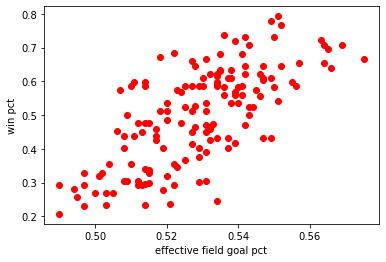

In [9]:
import matplotlib.pyplot as plt
plt.plot(efg,win,'ro')
plt.ylabel('win pct')
plt.xlabel('effective field goal pct')
plt.show()

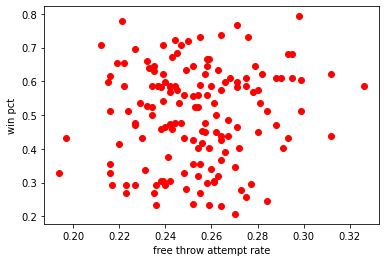

In [10]:
plt.plot(fta,win,'ro')
plt.ylabel('win pct')
plt.xlabel('free throw attempt rate')
plt.show()

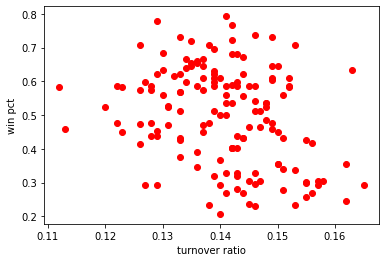

In [11]:
plt.plot(tov,win,'ro')
plt.ylabel('win pct')
plt.xlabel('turnover ratio')
plt.show()

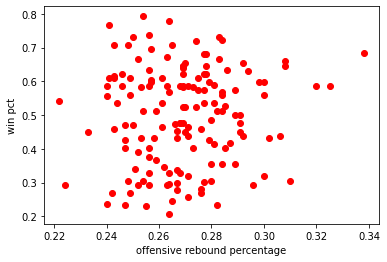

In [12]:
plt.plot(oreb,win,'ro')
plt.ylabel('win pct')
plt.xlabel('offensive rebound percentage')
plt.show()

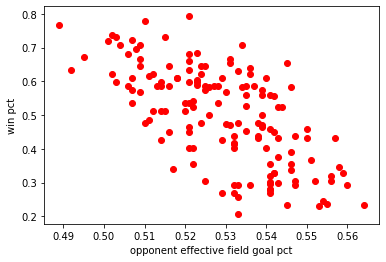

In [13]:
plt.plot(opefg,win,'ro')
plt.ylabel('win pct')
plt.xlabel('opponent effective field goal pct')
plt.show()

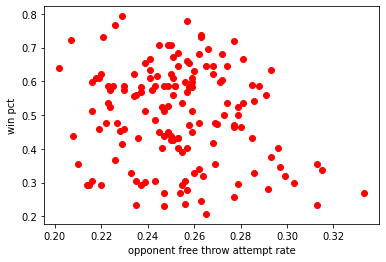

In [14]:
plt.plot(opfta,win,'ro')
plt.ylabel('win pct')
plt.xlabel('opponent free throw attempt rate')
plt.show()

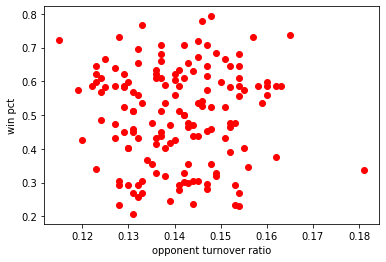

In [15]:
plt.plot(optov,win,'ro')
plt.ylabel('win pct')
plt.xlabel('opponent turnover ratio')
plt.show()

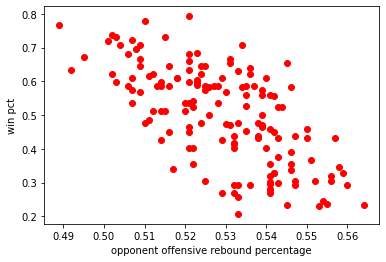

In [16]:
plt.plot(oporeb,win,'ro')
plt.ylabel('win pct')
plt.xlabel('opponent offensive rebound percentage')
plt.show()

In [17]:
print(mod)

    EFG_PCT  FTA_RATE  TM_TOV_PCT  OREB_PCT  OPP_EFG_PCT  OPP_FTA_RATE  \
0     0.543     0.253       0.120     0.269        0.543         0.224   
1     0.542     0.239       0.139     0.277        0.502         0.234   
2     0.540     0.246       0.141     0.281        0.521         0.255   
3     0.544     0.234       0.131     0.270        0.544         0.246   
4     0.541     0.248       0.130     0.249        0.541         0.251   
..      ...       ...         ...       ...          ...           ...   
25    0.502     0.194       0.143     0.264        0.542         0.260   
26    0.507     0.245       0.137     0.277        0.507         0.224   
27    0.539     0.250       0.135     0.274        0.501         0.277   
28    0.527     0.260       0.152     0.256        0.506         0.247   
29    0.525     0.254       0.148     0.274        0.522         0.279   

    OPP_TOV_PCT  OPP_OREB_PCT  W_PCT  
0         0.129         0.269  0.524  
1         0.140         0.275  0.

Creating training data in the form of a numpy array

In [18]:
import numpy as np

In [19]:
y_train = mod[mod.columns[8]].to_numpy()
print(y_train)

[0.524 0.622 0.537 0.524 0.561 0.537 0.634 0.585 0.28  0.646 0.244 0.305
 0.512 0.402 0.683 0.646 0.622 0.561 0.439 0.451 0.293 0.268 0.622 0.78
 0.329 0.366 0.415 0.585 0.598 0.427 0.569 0.5   0.667 0.458 0.431 0.306
 0.583 0.653 0.278 0.542 0.236 0.472 0.653 0.583 0.528 0.556 0.639 0.319
 0.431 0.569 0.306 0.292 0.681 0.708 0.583 0.431 0.458 0.375 0.722 0.472
 0.299 0.667 0.486 0.354 0.338 0.292 0.573 0.63  0.303 0.231 0.611 0.616
 0.681 0.732 0.466 0.603 0.767 0.297 0.417 0.318 0.611 0.452 0.589 0.466
 0.473 0.431 0.451 0.736 0.611 0.347 0.354 0.598 0.512 0.476 0.268 0.232
 0.402 0.659 0.5   0.695 0.646 0.585 0.585 0.451 0.402 0.476 0.732 0.439
 0.402 0.207 0.598 0.512 0.622 0.232 0.646 0.476 0.585 0.707 0.61  0.39
 0.293 0.671 0.341 0.439 0.329 0.61  0.293 0.561 0.476 0.707 0.793 0.585
 0.512 0.427 0.268 0.537 0.537 0.573 0.585 0.354 0.585 0.305 0.634 0.256
 0.598 0.329 0.573 0.72  0.585 0.524]


In [20]:
x_train = mod.iloc[0:].values
temptrain = np.empty([150,8])
for element in range(150):
  temptrain[element] = x_train[element][0:8]
x_train = temptrain
print(x_train)


[[0.543 0.253 0.12  ... 0.224 0.129 0.269]
 [0.542 0.239 0.139 ... 0.234 0.14  0.275]
 [0.54  0.246 0.141 ... 0.255 0.133 0.296]
 ...
 [0.539 0.25  0.135 ... 0.277 0.145 0.275]
 [0.527 0.26  0.152 ... 0.247 0.154 0.244]
 [0.525 0.254 0.148 ... 0.279 0.151 0.268]]


In [21]:
type(x_train)

numpy.ndarray

Creating linear regression model, splitting data into train and test with a 100:50 split, and testing the model. 

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

temp_X_train = x_train[0:100]
temp_X_test = x_train[100:]

temp_y_train = y_train[0:100]
temp_y_test = y_train[100:]

regr = linear_model.LinearRegression()

regr.fit(temp_X_train, temp_y_train)

temp_y_pred = regr.predict(temp_X_test)

print(temp_y_pred)
print(temp_y_test)
print(temp_y_train)
# The coefficients
print("Coefficients: \n", regr.coef_)

sk.metrics.mean_absolute_error(temp_y_test,temp_y_pred, sample_weight=None, multioutput='uniform_average')


[0.59451303 0.62679821 0.50609515 0.49850637 0.43427738 0.52044928
 0.73666176 0.45102197 0.45867977 0.25036082 0.60547967 0.53027811
 0.55479364 0.22019345 0.56834279 0.51878537 0.53943752 0.67850069
 0.66347288 0.43951396 0.34913602 0.6151915  0.35611262 0.54070327
 0.31802177 0.5166858  0.43266966 0.49879273 0.52671332 0.68397894
 0.70689065 0.57471832 0.52334935 0.47102018 0.30335577 0.53146041
 0.50880599 0.56305703 0.58038141 0.38208161 0.59222968 0.37953197
 0.61352617 0.22632522 0.53768029 0.3087579  0.58665865 0.69623814
 0.63114873 0.51621738]
[0.646 0.585 0.585 0.451 0.402 0.476 0.732 0.439 0.402 0.207 0.598 0.512
 0.622 0.232 0.646 0.476 0.585 0.707 0.61  0.39  0.293 0.671 0.341 0.439
 0.329 0.61  0.293 0.561 0.476 0.707 0.793 0.585 0.512 0.427 0.268 0.537
 0.537 0.573 0.585 0.354 0.585 0.305 0.634 0.256 0.598 0.329 0.573 0.72
 0.585 0.524]
[0.524 0.622 0.537 0.524 0.561 0.537 0.634 0.585 0.28  0.646 0.244 0.305
 0.512 0.402 0.683 0.646 0.622 0.561 0.439 0.451 0.293 0.268 0

0.03982780874585992

On the 50 datapoints not trained on, the linear regression model generated a mean absolute error of 0.0398

Load the current NBA season 2022-23 to test against models

In [23]:

import requests
import pandas as pd

url = 'https://stats.nba.com/stats/leaguedashteamstats'

params =(
("Conference",""), 
("DateFrom",""), 
("DateTo", ""),
("Division:", ""),
("GameScope:", ""),
("GameSegment", ""),
("Height", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Four Factors"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"), 
("PaceAdjust", "N"),
("PerMode", "Per100Possessions"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"),
("Season", "2022-23"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),
("TeamID", "0"),
("TwoWay", "0"),
("VsConference", ""),
("VsDivision", ""))
    


header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 Edg/87.0.664.66",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}


response = requests.get(url, headers=header, params=params)
response_json = response.json()
predframe = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
predframe.columns = response_json['resultSets'][0]['headers']
predframe.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,...,W_PCT_RANK,MIN_RANK,EFG_PCT_RANK,FTA_RATE_RANK,TM_TOV_PCT_RANK,OREB_PCT_RANK,OPP_EFG_PCT_RANK,OPP_FTA_RATE_RANK,OPP_TOV_PCT_RANK,OPP_OREB_PCT_RANK
0,1610612737,Atlanta Hawks,59,29,30,0.492,2857.0,0.535,0.235,0.124,...,17,13,20,28,2,19,14,11,14,22
1,1610612738,Boston Celtics,59,42,17,0.712,2872.0,0.565,0.251,0.133,...,1,10,5,25,6,27,6,2,27,1
2,1610612751,Brooklyn Nets,58,34,24,0.586,2789.0,0.577,0.251,0.143,...,7,26,2,24,18,30,3,26,19,29
3,1610612766,Charlotte Hornets,60,17,43,0.283,2910.0,0.514,0.258,0.134,...,27,6,29,21,7,13,23,16,11,21
4,1610612741,Chicago Bulls,59,26,33,0.441,2857.0,0.546,0.256,0.137,...,24,13,13,22,10,28,15,9,13,3


Manipulating the data into arrays in order to perform prediction and evaluate the models.

In [24]:
predmod = predframe[["EFG_PCT","FTA_RATE","TM_TOV_PCT","OREB_PCT","OPP_EFG_PCT","OPP_FTA_RATE","OPP_TOV_PCT","OPP_OREB_PCT","W_PCT"]]
print(predmod)

    EFG_PCT  FTA_RATE  TM_TOV_PCT  OREB_PCT  OPP_EFG_PCT  OPP_FTA_RATE  \
0     0.535     0.235       0.124     0.276        0.543         0.263   
1     0.565     0.251       0.133     0.248        0.531         0.230   
2     0.577     0.251       0.143     0.228        0.526         0.291   
3     0.514     0.258       0.134     0.285        0.552         0.271   
4     0.546     0.256       0.137     0.236        0.543         0.259   
5     0.556     0.273       0.143     0.277        0.533         0.264   
6     0.561     0.313       0.127     0.234        0.549         0.294   
7     0.582     0.261       0.150     0.285        0.546         0.274   
8     0.522     0.310       0.147     0.289        0.562         0.290   
9     0.571     0.222       0.158     0.263        0.546         0.288   
10    0.512     0.293       0.169     0.342        0.558         0.275   
11    0.536     0.262       0.149     0.287        0.548         0.288   
12    0.543     0.274       0.142     

In [25]:
y_test23 = predmod[predmod.columns[8]].to_numpy()
print(y_test23)

[0.492 0.712 0.586 0.283 0.441 0.623 0.517 0.695 0.254 0.5   0.224 0.433
 0.541 0.458 0.614 0.542 0.707 0.508 0.508 0.55  0.491 0.407 0.667 0.533
 0.483 0.561 0.237 0.475 0.483 0.483]


In [26]:
x_test23 = predmod.iloc[0:].values
temptrain23 = np.empty([30,8])
for element in range(30):
  temptrain23[element] = x_test23[element][0:8]
x_test23 = temptrain23
print(x_test23)

[[0.535 0.235 0.124 0.276 0.543 0.263 0.142 0.29 ]
 [0.565 0.251 0.133 0.248 0.531 0.23  0.125 0.248]
 [0.577 0.251 0.143 0.228 0.526 0.291 0.138 0.309]
 [0.514 0.258 0.134 0.285 0.552 0.271 0.146 0.289]
 [0.546 0.256 0.137 0.236 0.543 0.259 0.145 0.258]
 [0.556 0.273 0.143 0.277 0.533 0.264 0.156 0.271]
 [0.561 0.313 0.127 0.234 0.549 0.294 0.138 0.279]
 [0.582 0.261 0.15  0.285 0.546 0.274 0.139 0.266]
 [0.522 0.31  0.147 0.289 0.562 0.29  0.138 0.295]
 [0.571 0.222 0.158 0.263 0.546 0.288 0.142 0.278]
 [0.512 0.293 0.169 0.342 0.558 0.275 0.133 0.274]
 [0.536 0.262 0.149 0.287 0.548 0.288 0.154 0.311]
 [0.543 0.274 0.142 0.275 0.54  0.257 0.131 0.264]
 [0.54  0.289 0.135 0.259 0.539 0.232 0.123 0.276]
 [0.531 0.273 0.14  0.321 0.522 0.259 0.151 0.29 ]
 [0.519 0.26  0.137 0.276 0.556 0.255 0.167 0.264]
 [0.543 0.254 0.147 0.293 0.516 0.23  0.118 0.252]
 [0.56  0.27  0.154 0.258 0.543 0.293 0.155 0.304]
 [0.541 0.285 0.149 0.299 0.545 0.27  0.15  0.272]
 [0.529 0.286 0.129 0.321 0.528

In [28]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
temp_X_train.shape

(100, 8)

In [30]:
print(temp_X_train)

[[0.543 0.253 0.12  0.269 0.543 0.224 0.129 0.269]
 [0.542 0.239 0.139 0.277 0.502 0.234 0.14  0.275]
 [0.54  0.246 0.141 0.281 0.521 0.255 0.133 0.296]
 [0.544 0.234 0.131 0.27  0.544 0.246 0.148 0.294]
 [0.541 0.248 0.13  0.249 0.541 0.251 0.132 0.265]
 [0.538 0.261 0.148 0.277 0.52  0.223 0.138 0.276]
 [0.538 0.249 0.13  0.256 0.521 0.241 0.136 0.267]
 [0.556 0.244 0.146 0.268 0.537 0.249 0.129 0.248]
 [0.494 0.249 0.143 0.276 0.541 0.292 0.147 0.293]
 [0.552 0.235 0.15  0.269 0.509 0.265 0.147 0.264]
 [0.534 0.284 0.162 0.265 0.554 0.263 0.139 0.29 ]
 [0.531 0.239 0.145 0.31  0.552 0.256 0.133 0.275]
 [0.531 0.224 0.139 0.254 0.514 0.216 0.137 0.294]
 [0.537 0.259 0.142 0.256 0.54  0.257 0.138 0.28 ]
 [0.522 0.245 0.13  0.338 0.523 0.253 0.149 0.274]
 [0.547 0.252 0.149 0.278 0.524 0.268 0.154 0.265]
 [0.546 0.257 0.133 0.269 0.536 0.22  0.129 0.253]
 [0.539 0.254 0.141 0.284 0.535 0.291 0.16  0.294]
 [0.517 0.264 0.143 0.306 0.547 0.25  0.144 0.258]
 [0.513 0.28  0.137 0.291 0.521

Creating the keras model: one input layer, one output layer, and three hidden layers.

In [31]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_shape=(None,100,8), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# fit the model on the dataset
model.fit(temp_X_train, temp_y_train, epochs=3000, batch_size=30)


Epoch 1/3000


Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 5ms/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 502/3000
4/4 [==============================] - 0s 7ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 503/3000
4/4 [==============================] - 0s 7ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 504/3000
4/4 [==============================] - 0s 7ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 505/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 506/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 507/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 508/3000
4/4 [==============================] - 0s 8ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 509/3000
4/4 [==============================] - 0s 8ms/step - loss: 0.0092 - m

2/2 [==============================] - 1s 9ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Accuracy: 0.21


In [33]:
modelpreds = model.predict(x_test23)
print(modelpreds)

1/1 [==============================] - 0s 185ms/step
[[0.48897287]
 [0.6601236 ]
 [0.58690476]
 [0.32983154]
 [0.5185085 ]
 [0.67415804]
 [0.5721468 ]
 [0.6421764 ]
 [0.29467437]
 [0.4581322 ]
 [0.27640733]
 [0.36492962]
 [0.47841555]
 [0.44761387]
 [0.6314062 ]
 [0.4438379 ]
 [0.5792285 ]
 [0.4738834 ]
 [0.50983137]
 [0.5497304 ]
 [0.5475234 ]
 [0.38131627]
 [0.6170532 ]
 [0.50599647]
 [0.44118464]
 [0.57969   ]
 [0.2578341 ]
 [0.48339766]
 [0.4343481 ]
 [0.5254858 ]]


In [35]:
modelpreds.shape

(30, 1)

In [39]:
a = np.empty(30)
for i in range(30):
  a[i]=(modelpreds[i][0])
modelpreds = a
print(modelpreds)

[0.48897287 0.66012359 0.58690476 0.32983154 0.51850849 0.67415804
 0.57214677 0.64217639 0.29467437 0.45813221 0.27640733 0.36492962
 0.47841555 0.44761387 0.63140619 0.44383791 0.57922852 0.47388339
 0.50983137 0.54973042 0.54752338 0.38131627 0.61705321 0.50599647
 0.44118464 0.57968998 0.25783411 0.48339766 0.43434811 0.52548581]


Below are the results of how well the two models did at predicting win percentage against the data from the 2022-23 nba season (using mean absolute error as the evaluation metric).

In [42]:
#linear regression vs 2022-23 data

linear_y23 = regr.predict(x_test23)
sk.metrics.mean_absolute_error(y_test23,linear_y23, sample_weight=None, multioutput='uniform_average')


0.03486345922314287

In [41]:
#keras model vs 2022-23 data
sk.metrics.mean_absolute_error(y_test23,modelpreds, sample_weight=None, multioutput='uniform_average')


0.04116189266045889

Conclusions: 

Both the linear regression model and the neural network perform well at predicting the win-percentage of teams in the current NBA season given their four factor statistics. The linear model slightly outperforms the neural net with a mean absolute error of 0.0349 when comparing predicted win percentage and actual win percentage as opposed to the keras neural net that produced a mean absolute error of 0.0412. While this project itself cannot be used to predict outcomes of individual games, a follow up on this project would be to take data of two team's four factors in the past 5 games prior to a matchup and use that to predict the result of their match, possibly even taking into account individual contributions of players to adjust the matchup model for injuries or the addition of players to the roster. 